<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/presentaciones/C%C3%B3digo-Huffman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo y descripción

## Funciones y clases auxiliares

In [2]:
class Node:
  def __init__(self, key, priority):
    self.key = key
    self.priority = priority
    self.left = None
    self.right = None
    self.parent = None

def get_nodes(root):
  if root == None: return []

  n_left = get_nodes(root.left)
  n_right = get_nodes(root.right)

  n = n_left + n_right
  n.append(root)

  return n

class Heap:
  def __init__(self):
    self.A = list()
    self.size = 0

  def insert(self, node):
    if self.size == len(self.A): self.A.append(node)
    else: self.A[self.size] = node
    curr = self.size

    while True:  
      if curr == 0: break
      parent = (curr-1)//2

      if self.A[parent].priority > node.priority:
        curr = parent
      else: break

    self.A[self.size], self.A[curr] = self.A[curr], self.A[self.size]
    self.size += 1

  def pop(self):
    if self.size == 0: return

    node = self.A[0]
    self.A[0] = self.A[self.size-1]
    self.size -= 1
    curr = 0

    while True:
      left = curr*2+1
      right = curr*2+2
      aux = curr

      if left < self.size and self.A[left].priority < self.A[curr].priority:
        curr = left

      if right < self.size and self.A[right].priority < self.A[curr].priority:
        curr = right

      if curr == aux: break
      self.A[aux], self.A[curr] = self.A[curr], self.A[aux]

    return node

  def get_nodes(self):
    return self.A[:self.size]

In [3]:
def binary_tree_layout(G, root, width = 1., vert_gap = 0.2, vert_loc = 0, 
                       xcenter = 0.5, pos = None, parent = None):
  if pos == None:
    pos = {root:(xcenter, vert_loc)}
  else:
    pos[root] = (xcenter, vert_loc)

  neighbors = list(G.neighbors(root))
  
  if len(neighbors) != 0:

    dx = width/2.
    leftx = xcenter - dx/2
    rightx = xcenter + dx/2

    for neighbor in neighbors:
      if G.nodes[neighbor]['child_status'] == 'LEFT':
        pos = binary_tree_layout(G, neighbor, width = dx, vert_gap = vert_gap*1.15, 
                                 vert_loc = vert_loc-vert_gap, xcenter=leftx, 
                                 pos=pos, parent = root)
      
      elif G.nodes[neighbor]['child_status'] == 'RIGHT':
        pos = binary_tree_layout(G, neighbor, width = dx, vert_gap = vert_gap*1.15,
                                 vert_loc = vert_loc-vert_gap, xcenter=rightx,
                                 pos=pos, parent = root)
  return pos

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

def visualize_tree(N):
  T = nx.DiGraph()
  labels = dict()

  for i in range(0,len(N)):
    labels[N[i].key] = str(N[i].key) + '\n' + str(N[i].priority)

    if N[i].parent == None:
      T.add_node(N[i].key, child_status='LEFT')
      root_key = N[i].key
      continue

    if N[i].parent.left == N[i]:
      T.add_node(N[i].key, child_status='LEFT')
      T.add_edge(N[i].parent.key, N[i].key, weight=0)
    else:
      T.add_node(N[i].key, child_status='RIGHT')
      T.add_edge(N[i].parent.key, N[i].key, weight=1)

  tree_pos = binary_tree_layout(T, root_key)
  nx.draw(T, tree_pos, with_labels=True, font_size=9.5, node_size=1200,
          node_color='white', edgecolors='black', labels=labels)
  
  edge_labels = nx.get_edge_attributes(T, 'weight')
  nx.draw_networkx_edge_labels(T, tree_pos, edge_labels, font_size=9.5,
                               rotate=False)

## Código de Huffman

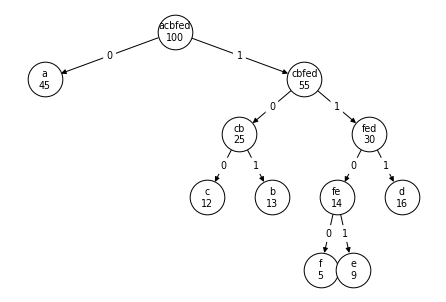

In [5]:
def huffman(F):
  heap = Heap()
  for key, value in F.items():
    node = Node(key, value)
    heap.insert(node)

  for i in range(heap.size-1):
    x = heap.pop()
    y = heap.pop()

    z = Node(x.key + y.key, x.priority + y.priority)
    z.left = x
    z.right = y
    x.parent = z
    y.parent = z

    heap.insert(z)

  root = heap.pop()
  visualize_tree(get_nodes(root))

  return root

frecuencias = {
    'a': 45,
    'b': 13,
    'c': 12,
    'd': 16,
    'e': 9,
    'f': 5
}

root = huffman(frecuencias)

## Descripción

La entrada consiste en un diccionario con las frecuencias de cada caracter. Los pasos del algoritmo son los siguientes:

1. Se insertan los caracteres en un montículo de mínimos ordenados por su frecuencia (el caracter con menor frecuencia es la raíz).

2. Se elimina dos veces la raíz del montículo y se guardan estos elementos en dos nodos $x$ e $y$.

3. Se crea un nodo padre para $x$ e $y$ concatenando sus claves y sumando sus frecuencias. Ej: $a: 25, b: 30 → ab: 55$.

4. Se inserta este nodo en el montículo. (Nota: a pesar de que este nodo tiene dos hijos, esto no influye en las operaciones del montículo, ya que solamente se usa la clave y la frecuencia de los nodos)

5. Se repite desde el paso 2 hasta que el montículo tenga un solo elemento.

6. Se retorna la raíz del montículo (que también corresponde a la raíz del árbol de decodificación final).

## Ejemplo

Tenemos la siguiente tabla de caracteres con su frecuencia:

$F = \{a: 30, b: 40, c: 20, d: 10\}$

Insertamos nodos de la forma (clave, frecuencia) en un montículo de mínimos:

<img src="https://drive.google.com/uc?export=view&id=121VKBmf11Zsse6MwUVf7E417cz3ys2Nc" width="500"/>

Eliminamos los dos elementos menores del montículo y los guardamos en los nodos $x$ e $y$:

$x = \{d, 10\}$

$y = \{c, 20\}$

<img src="https://drive.google.com/uc?export=view&id=1cqBmiTjbju1NDllv4tVI2MV0xLQDXKwE" width="500"/>

Creamos un nuevo nodo $z$ padre de $x$ e $y$ con la clave $dc$ y frecuencia $30$:

<img src="https://drive.google.com/uc?export=view&id=1LslbxRtyWCT_Dn42jv1YK9jl7Vz2xT-T" width="500"/>

Insertamos el nodo $\{dc, 30\}$ en el montículo:

<img src="https://drive.google.com/uc?export=view&id=12o24Lrw5U2ImZBR_2u4FQHSbTfZpfucR" width="500"/>

Eliminamos los dos elementos menores del montículo y los guardamos en los nodos $x$ e $y$:

$x = \{a, 30\}$

$y = \{dc, 30\}$

<img src="https://drive.google.com/uc?export=view&id=1JpXWAo-nz7zOrJNzihP0VQ8lvULN_NgR" width="500"/>

Creamos un nuevo nodo $z$ padre de $x$ e $y$ con la clave $adc$ y frecuencia $60$:

<img src="https://drive.google.com/uc?export=view&id=1csAg8hwyOYCq4sBAohXTqI7Qpvl-HT7q" width="500"/>

Insertamos el nodo $\{adc, 60\}$ en el montículo:

<img src="https://drive.google.com/uc?export=view&id=1DoQ97w7Pfr5l5RxR2sA45ORJ3Ek0WjvM" width="500"/>

Eliminamos los dos elementos menores del montículo y los guardamos en los nodos $x$ e $y$:

$x = \{b, 40\}$

$y = \{adc, 60\}$

Creamos un nuevo nodo $z$ padre de $x$ e $y$ con la clave $badc$ y frecuencia $100$:

<img src="https://drive.google.com/uc?export=view&id=1-ok_MNaDqF54bVURKjE_tnz4eWlxGcSg" width="500"/>

Listo! Ya tenemos nuestro árbol de decodificación. Para codificar o decodificar un string, podemos crear una tabla con un código binario óptimo para cada caracter, según la ubicación del nodo (hijo izquierdo: 0, hijo derecho: 1)

<img src="https://drive.google.com/uc?export=view&id=1un_8caW0-bWOFIqUO2ZunUrIfsd1vPCB" width="500"/>

<img src="https://drive.google.com/uc?export=view&id=1BL903BNwm4MKVRLjPYVX-CAb3_yBqSzG" width="400"/>

# Correctitud

### **Teorema 1: Optimalidad**

*El algoritmo de Huffman construye un árbol óptimo donde $x$ e $y$ son los nodos con menor frecuencia y están en la máxima profundidad del árbol.*

Asumiendo que los caracteres de un string cumplen con las frecuencias de entrada, entonces la cantidad de bits del string codificado se calcula como:

$B(T) = \sum\limits_i p_i \cdot d_T(i)$

donde los nodos $i$ corresponden a las hojas del árbol de decodificación, $p_i$ corresponde a la frecuencia del caracter y $d_i$ corresponde a la profundidad del nodo.

**Nota:** esta definición es muy parecida a la de costo esperado del árbol de búsqueda óptimo, sin embargo, en este caso solo consideramos los nodos hoja.

## Prueba del teorema

Supongamos que tenemos dos árboles $T$ y $T^\prime$. El árbol $T$ representa una árbol óptimo arbitrario mientras que $T^\prime$ representa el árbol generado por el algoritmo de Huffman. Ambos árboles tienen los mismos nodos, sin embargo el árbol $T$ tiene dos nodos $a$ y $b$ con frecuencia arbitraria ubicados en la parte más baja del árbol, mientras que el árbol $T^\prime$ posee a esta misma profundidad los nodos $x$ e $y$ con las menores frecuencias.

Árbol $T$:

<img src="https://drive.google.com/uc?export=view&id=1a3CKIfZTotFbw8XWpfu71R4sEzWRA1Tf" width="500"/>

Árbol $T^\prime$

<img src="https://drive.google.com/uc?export=view&id=1tgrOw47pl0kjsfYbFc0krxf9kxUpBji2" width="500"/>

Para demostrar la optimalidad del algoritmo, debemos demostrar que $B(T) \geq B(T^\prime)$. Con esto estamos diciendo que el algoritmo genera, de todos los árboles posibles, aquel que tiene un menor costo.

$B(T) \geq B(T^\prime)$

$B(T) - B(T^\prime) \geq 0$

$\sum\limits_i p_i \cdot d_T(i) - \sum\limits_i p_i \cdot d_{T^\prime}(i) \geq 0$

Nota: el resto de nodos permanece en la misma posición en ambos árboles, por lo tanto, solo consideramos los nodos $a$, $b$, $x$ e $y$.

$p_a \cdot d_T(a) + p_b \cdot d_T(b) + p_x \cdot d_T(x) + p_y \cdot d_T(y) - p_a \cdot d_{T^\prime}(a) - p_b \cdot d_{T^\prime}(b) - p_x \cdot d_{T^\prime}(x) - p_y \cdot d_{T^\prime}(y) \geq 0$

Observemos que:

$d_{T^\prime}(a) = d_T(x)$

$d_{T^\prime}(b) = d_T(y)$

$d_{T^\prime}(x) = d_T(a)$

$d_{T^\prime}(y) = d_T(b)$

Reemplazando:

$p_a \cdot d_T(a) + p_b \cdot d_T(b) + p_x \cdot d_T(x) + p_y \cdot d_T(y) - p_a \cdot d_T(x) - p_b \cdot d_T(y) - p_x \cdot d_T(a) - p_y \cdot d_T(b) \geq 0$

Factorizando:

$p_a(d_T(a) - d_T(x)) + p_b(d_T(b) - d_T(y)) + p_x(d_T(x) - d_T(a)) + p_y(d_T(y) - d_T(b)) \geq 0$

$(p_a - p_x)(d_T(a) - d_T(x)) + (p_b - p_y)(d_T(b) - d_T(y)) \geq 0$

Luego, sabemos que $p_a - p_x \geq 0$, pues $x$ corresponde al nodo con la menor frecuencia. De igual manera, $p_b - p_y \geq 0$. También sabemos que $d_T(a) - d_T(x) \geq 0$ y $d_T(b) - d_T(y) \geq 0$, pues $a$ y $b$ corresponden a los nodos con mayor profundidad del árbol $T$. Por lo tanto, ambos productos son positivos y la inecuación se cumple. $\Box$







